##Importing Pandas

In [1]:
import pandas as pd

## Reading Data

In [2]:
df = pd.read_csv('/kaggle/input/ai-developer-productivity-dataset/ai_dev_productivity.csv')
print(df.columns)

Index(['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load',
       'task_success'],
      dtype='object')


##Printing first 5 datas

In [3]:
print(df.head())

   hours_coding  coffee_intake_mg  distractions  sleep_hours  commits  \
0          5.99               600             1          5.8        2   
1          4.72               568             2          6.9        5   
2          6.30               560             1          8.9        2   
3          8.05               600             7          6.3        9   
4          4.53               421             6          6.9        4   

   bugs_reported  ai_usage_hours  cognitive_load  task_success  
0              1            0.71             5.4             1  
1              3            1.75             4.7             1  
2              0            2.27             2.2             1  
3              5            1.40             5.9             0  
4              0            1.26             6.3             1  


##Checking if there are null datas

In [4]:
print(df.isnull().sum())

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64


### Importing Matplotlib and seaborn


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualizing exam score

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


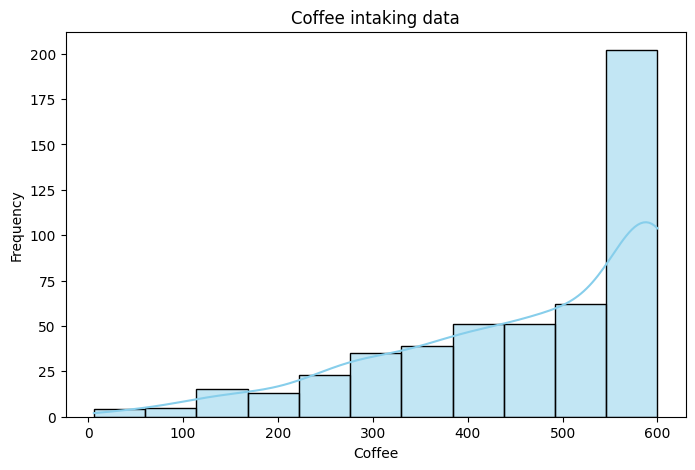

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['coffee_intake_mg'], kde=True, color='skyblue')
plt.title('Coffee intaking data')
plt.xlabel('Coffee')
plt.ylabel('Frequency')
plt.show()


### Here, we can see there are 500 rows of data in every column

In [7]:
print(df)

     hours_coding  coffee_intake_mg  distractions  sleep_hours  commits  \
0            5.99               600             1          5.8        2   
1            4.72               568             2          6.9        5   
2            6.30               560             1          8.9        2   
3            8.05               600             7          6.3        9   
4            4.53               421             6          6.9        4   
..            ...               ...           ...          ...      ...   
495          6.08               594             1          5.3        3   
496          2.93               382             2          6.7        3   
497          4.62               494             4          7.5        2   
498          3.25               296             6          6.9        1   
499          2.23               252             4          8.8        0   

     bugs_reported  ai_usage_hours  cognitive_load  task_success  
0                1            0.

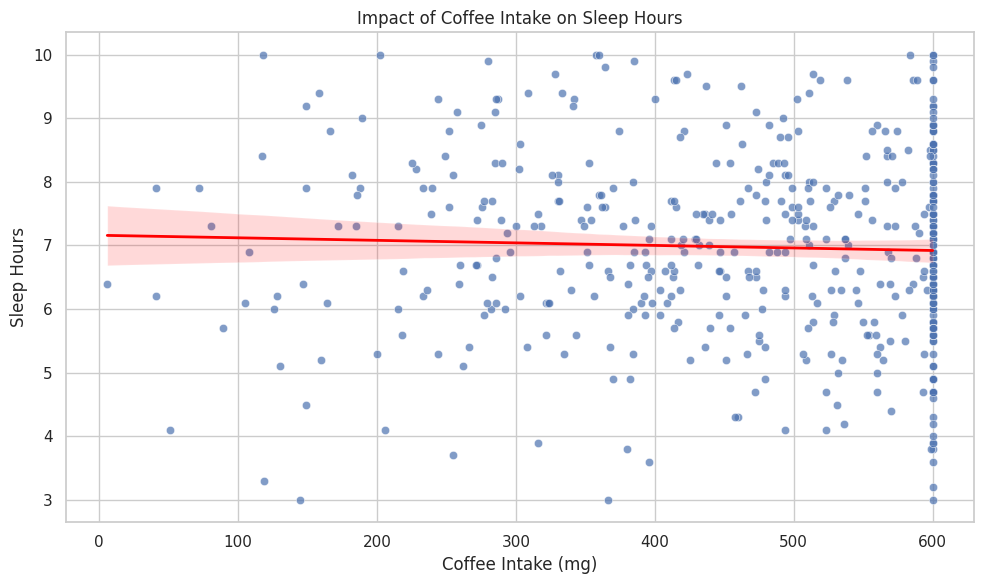

In [8]:
# Seting a visual style
sns.set(style="whitegrid")

# Ploting to visualize the impact of coffee intake on sleep hours
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='coffee_intake_mg', y='sleep_hours', alpha=0.7)
sns.regplot(data=df, x='coffee_intake_mg', y='sleep_hours', scatter=False, color='red', line_kws={"linewidth":2})

plt.title('Impact of Coffee Intake on Sleep Hours')
plt.xlabel('Coffee Intake (mg)')
plt.ylabel('Sleep Hours')
plt.tight_layout()
plt.show()

### Correlation Heatmap

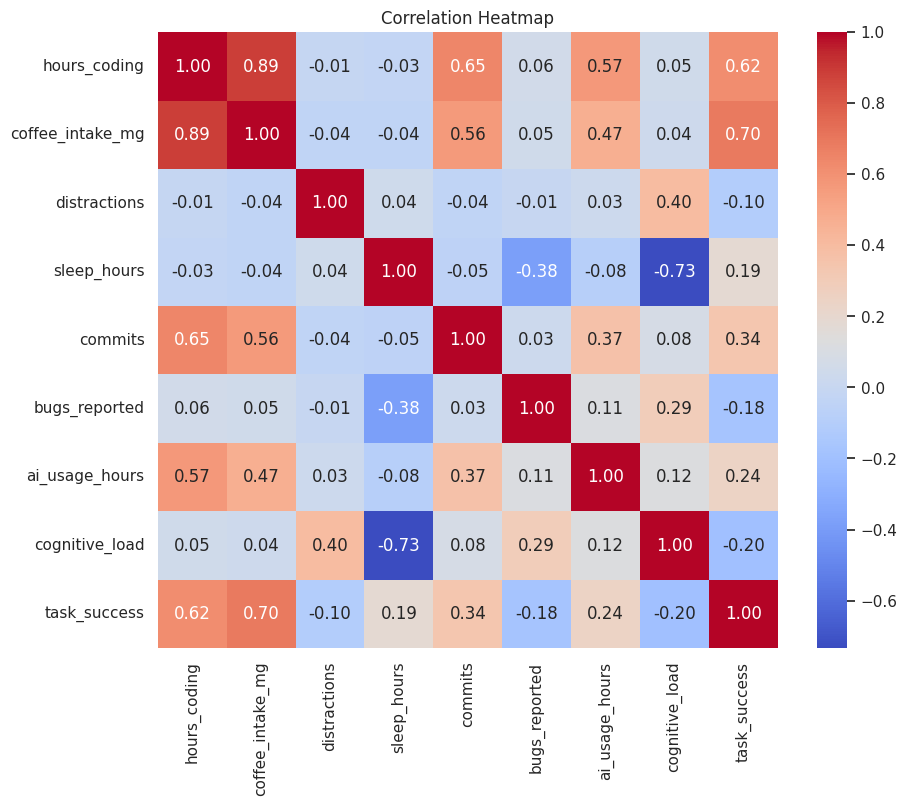

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Relationship betweep AI Usuage and Task Success

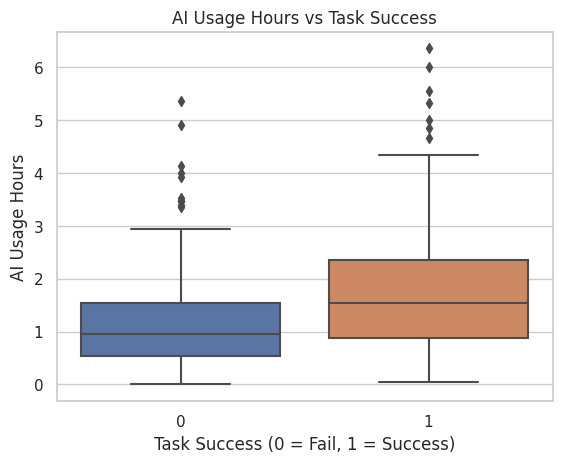

In [10]:
sns.boxplot(x='task_success', y='ai_usage_hours', data=df)
plt.title("AI Usage Hours vs Task Success")
plt.xlabel("Task Success (0 = Fail, 1 = Success)")
plt.ylabel("AI Usage Hours")
plt.show()


### Outlier Detection

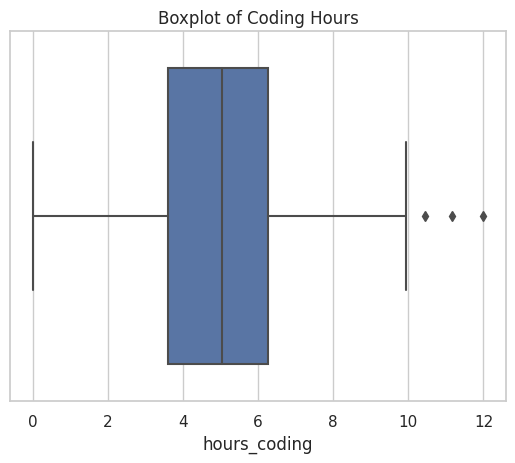

In [11]:
sns.boxplot(x=df['hours_coding'])
plt.title("Boxplot of Coding Hours")
plt.show()


### Here, accuracy = 0.84

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = df[['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours', 'ai_usage_hours']]
y = df['task_success']  # 0 or 1

# Spliting into training and testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.84


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Accuracy increased using scaling
#### Accuracy = 0.86

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Make a pipeline that first scales the data, then applies logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy (scaled):", accuracy)


Model Accuracy (scaled): 0.86


### Looking the impacts 

In [14]:
import numpy as np

# Access the trained Logistic Regression from the pipeline
logreg = model.named_steps['logisticregression']

# Get feature importances (coefficients)
coefficients = logreg.coef_[0]
feature_names = X.columns

# Show them nicely
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.3f}")


hours_coding: 0.657
coffee_intake_mg: 2.659
distractions: -0.548
sleep_hours: 1.234
ai_usage_hours: -0.374


### Visualizing the impacts

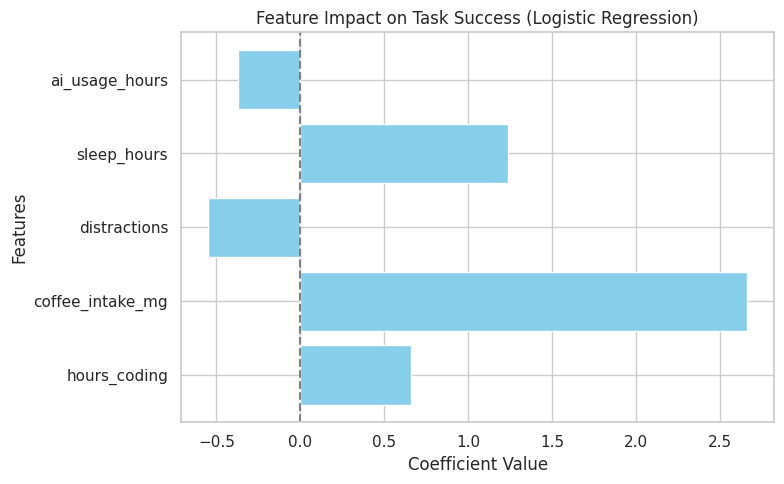

In [15]:
import matplotlib.pyplot as plt

# Plotting feature importance
plt.figure(figsize=(8,5))
plt.barh(feature_names, coefficients, color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title("Feature Impact on Task Success (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()


### Trying Decision Tree Classifier
#### Here, we have improved accuracy , Accuracy = 0.95

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict
y_pred_tree = tree_model.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93        34
           1       0.97      0.95      0.96        66

    accuracy                           0.95       100
   macro avg       0.94      0.95      0.94       100
weighted avg       0.95      0.95      0.95       100



### Visualizing the tree

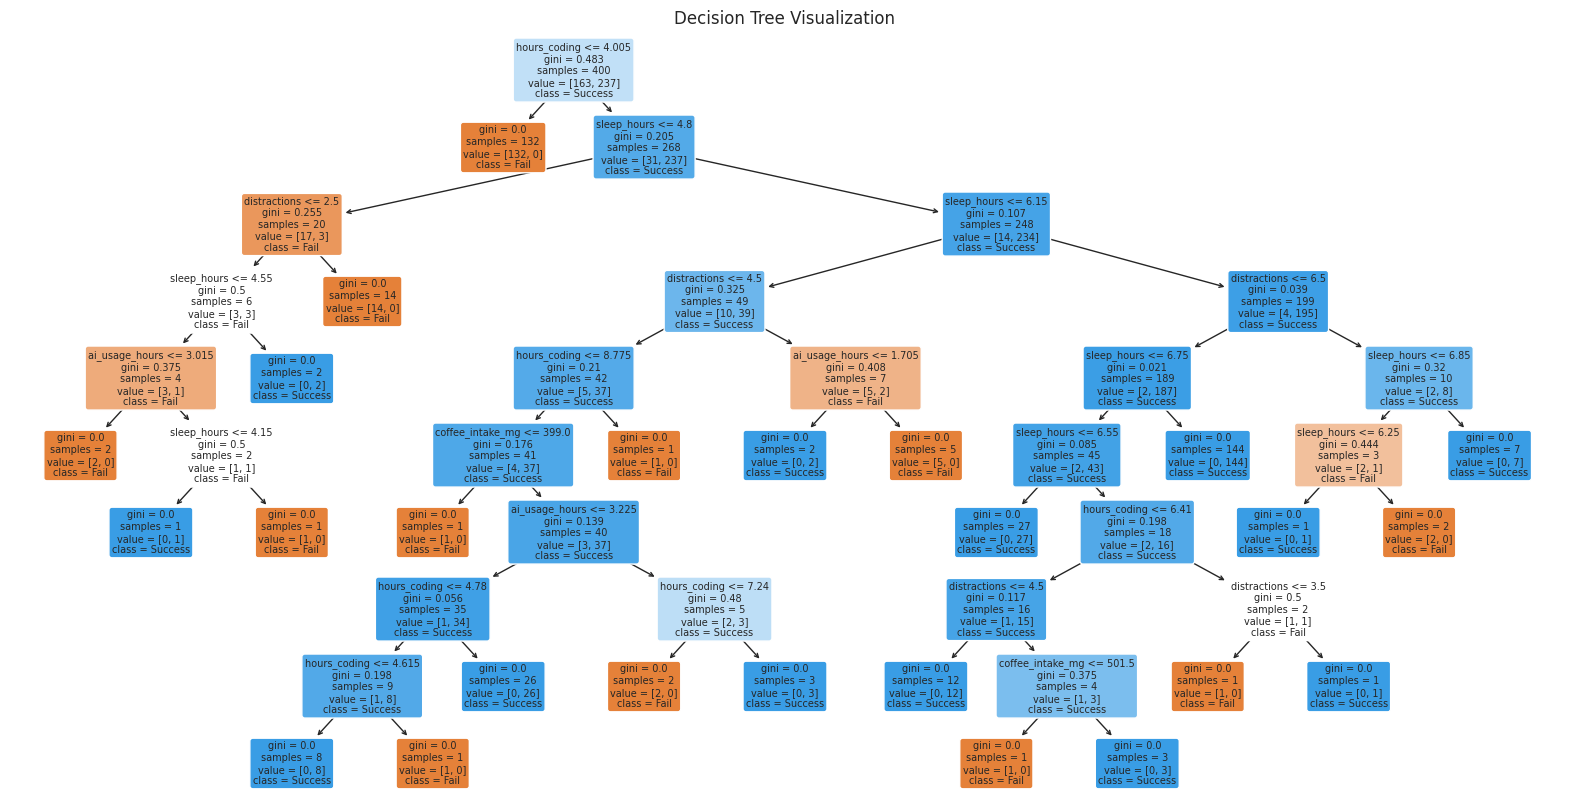

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=["Fail", "Success"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


### Trying Random Forest
#### More improved Accuracy of 0.98

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.98      0.98      0.98        66

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



### What the Random Forest considers most important in making decisions?

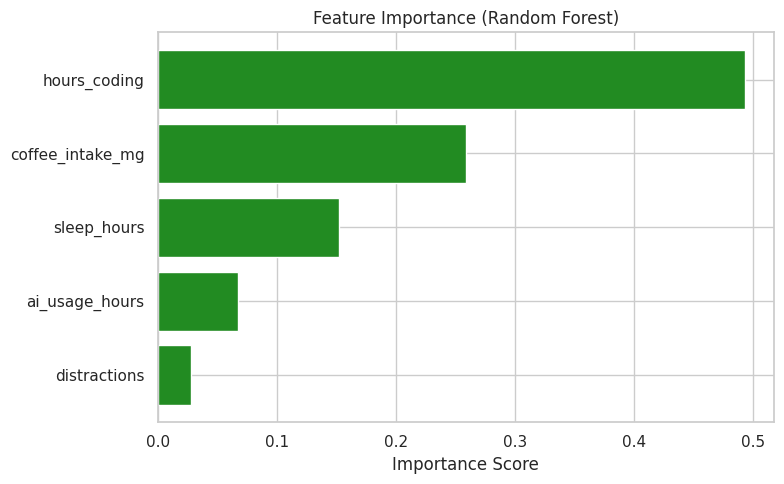

In [19]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for nicer plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='forestgreen')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()